1. Compute the gradient and Hessians of the loss function for linear regression with L2 regularization.

We take the derivative of the loss function with respect to $w'$ and get:
$$ \frac{\partial f(w')}{\partial w'} = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial (1 + \exp(-y_i w^T x_i))}{\partial w'}+ \frac{\partial (\lambda\lVert w\rVert_2^2)}{\partial w'}$$

Hence, the gradient is equal to:
$$ \nabla_{w'} f(w') = \frac{1}{n} \sum_{i=1}^{n} -y_i x_i \frac{\exp(-y_i w^T x_i)}{1 + \exp(-y_i w^T x_i)} + 2\lambda w$$

We then take the derivative of the gradient with respect to $w'$ and get:
$$ \frac{\partial^2 f(w')}{\partial w'^2} = \frac{\partial \nabla_{w'} f(w')}{\partial w'} = \frac{1}{n} \sum_{i=1}^{n} y_i^2 x_i^2 \frac{\exp(-y_i w^T x_i)}{(1 + \exp(-y_i w^T x_i))^2} + 2\lambda I$$

Hence, the Hessians is equal to:
$$\nabla^2_{w'} f(w') = \frac{1}{n} \sum_{i=1}^{n} y_i^2 x_i^2 \frac{\exp(-y_i w^T x_i)}{(1 + \exp(-y_i w^T x_i))^2} + 2\lambda I$$

In [1]:
#2. Empirically verify the correctness
import torch
import sklearn
from sklearn import datasets

#import breast cancer dataset
brest_cancer = datasets.load_breast_cancer()
X = brest_cancer.data
y = brest_cancer.target
y = y.reshape(-1,1)
#convert numpy array to torch tensor
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

#init tensor w as a vector
omega = torch.ones(X.shape[1],1,requires_grad=True) #w = [1...1]
bias = torch.ones(1,1,requires_grad=True)       #w0 = 1

#evaluate the gradients of f in part 1
def f(X, y, omega, bias):
    ll = 1
    #compute the loss
    loss = torch.sum(torch.log(1 + torch.exp(-y * (torch.matmul(X, omega) + bias))))*1/X.shape[0] + ll*torch.norm(omega)**2
    return loss

torchOmegaGrad = torch.autograd.grad(f(X, y, omega, bias), omega, create_graph=True)[0]
torchBiasGrad = torch.autograd.grad(f(X, y, omega, bias), bias, create_graph=True)[0]

# $$ \nabla_{w'} f(w') = \frac{1}{n} \sum_{i=1}^{n} -y_i x_i \frac{\exp(-y_i w^T x_i)}{1 + \exp(-y_i w^T x_i)} + 2\lambda w$$
myOmegaGrad = torch.sum(-y * X * torch.exp(-y * (torch.matmul(X, omega) + bias)) / (1 + torch.exp(-y * (torch.matmul(X, omega) + bias))), dim=0, keepdim=True).T/X.shape[0] + 2*omega
myBiasGrad = torch.sum(-y * torch.exp(-y * (torch.matmul(X, omega) + bias)) / (1 + torch.exp(-y * (torch.matmul(X, omega) + bias))), dim=0, keepdim=True).T/X.shape[0]

#compare the gradients in euclidean norm, which is the 2-norm
print("The difference between myOmegaGrad and torchOmegaGrad is: ", torch.norm(myOmegaGrad - torchOmegaGrad))
print("The difference between myBiasGrad and torchBiasGrad is: ", torch.norm(myBiasGrad - torchBiasGrad))

#compare the gradients in absolute value, which is the 1-norm
print("The difference between myOmegaGrad and torchOmegaGrad is: ", torch.norm(myOmegaGrad - torchOmegaGrad, p=1))
print("The difference between myBiasGrad and torchBiasGrad is: ", torch.norm(myBiasGrad - torchBiasGrad, p=1))


The difference between myOmegaGrad and torchOmegaGrad is:  tensor(0., grad_fn=<LinalgVectorNormBackward0>)
The difference between myBiasGrad and torchBiasGrad is:  tensor(0., grad_fn=<LinalgVectorNormBackward0>)
The difference between myOmegaGrad and torchOmegaGrad is:  tensor(0., grad_fn=<LinalgVectorNormBackward0>)
The difference between myBiasGrad and torchBiasGrad is:  tensor(0., grad_fn=<LinalgVectorNormBackward0>)


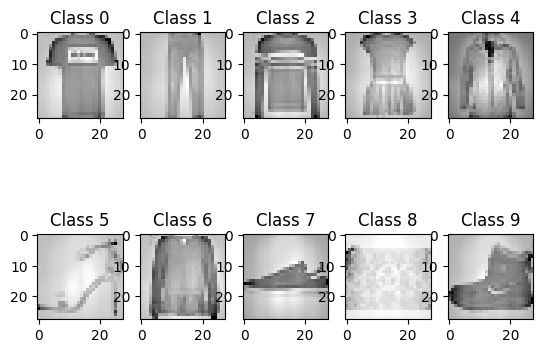

Train accuracy: 0.8640666666666666
Test accuracy: 0.7193
Train top-1 accuracy: 0.8640666666666666
Test top-1 accuracy: 0.7193
Train top-3 accuracy: 0.9843
Test top-3 accuracy: 0.9618
Train confusion matrix:
[[5056   14   93  271   21   16  470    4   52    3]
 [  20 5796   22  126   14    1   17    2    2    0]
 [  81   11 4588   56  707   11  509    2   34    1]
 [ 191   55   60 5343  188    1  144    1   15    2]
 [  11    8  475  185 4791    9  494    0   26    1]
 [   4    0    1    3    0 5596    2  260   32  102]
 [ 816   18  626  182  547    8 3719    5   76    3]
 [   0    0    0    0    0  223    0 5564   14  199]
 [  21    3   28   41   15   41   94   32 5715   10]
 [   0    2    0    1    0   98    1  218    4 5676]]
Test confusion matrix:
[[638   8  28  28 109   0 166   0  19   4]
 [  0 954   4  15  25   0   1   0   1   0]
 [  3   1 487   4 470   0  26   0   7   2]
 [ 14  30  19 692 210   0  28   0   2   5]
 [  0   0  13   1 975   0   4   0   5   2]
 [  1   0   0   0   0 46

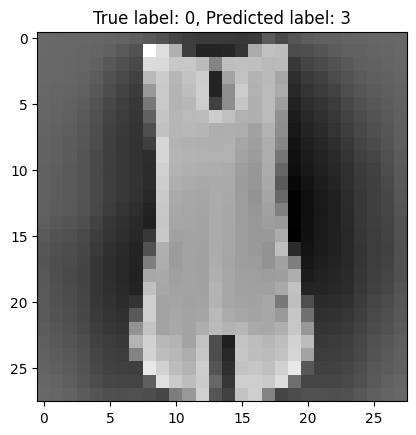

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, top_k_accuracy_score

# Load the MNIST reader
try:
	import mnist_reader
	import helper
except ModuleNotFoundError:
	import sys
	sys.path.append("utils")
	import mnist_reader
	import helper

# Load the Fashion-MNIST dataset
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Preprocess the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Display one of each of the ten image classes in the training data set
fig, axs = plt.subplots(2, 5)
for i in range(10):
    axs[i//5, i%5].imshow(helper.get_sprite_image(X_train[y_train == i][0]), cmap='gray')
    axs[i//5, i%5].set_title(f"Class {i}")
plt.show()

# Fit a multiclass logistic regression model, using the SAGA solver
#tol = 0.1 runs about 10s, tol = 0.01 runs about 1min, tol = 0.001 runs about 10min, tol = 0.00001 runs about 25min
clf = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000, tol=0.01) 
clf.fit(X_train, y_train)

# Predict the labels for train and test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Report the top-1 and top-3 classification accuracies and confusion matrices
print("Train accuracy:", np.mean(y_train == y_train_pred))
print("Test accuracy:", np.mean(y_test == y_test_pred))

print("Train top-1 accuracy:", top_k_accuracy_score(y_train, clf.predict_proba(X_train), k=1))
print("Test top-1 accuracy:", top_k_accuracy_score(y_test, clf.predict_proba(X_test), k=1))
print("Train top-3 accuracy:", top_k_accuracy_score(y_train, clf.predict_proba(X_train), k=3))
print("Test top-3 accuracy:", top_k_accuracy_score(y_test, clf.predict_proba(X_test), k=3))

print("Train confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Test confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Find a misclassified image in the training data sets
misclassified_idx = np.where(y_train != y_train_pred)[0][0]
plt.imshow(X_train[misclassified_idx].reshape(28, 28), cmap='gray')
plt.title(f"True label: {y_train[misclassified_idx]}, Predicted label: {y_train_pred[misclassified_idx]}")
plt.show()


• What conclusions do you draw about the performance of the model on the various classes,
given the confusion matrix on the test set?
• Select and display one of the misclassified images in the training data set: what class
should it have been classified as, and what class was it misclassified as?